# Problem

Dengue fever is a virus-caused disease that is spread by mosquitoes that a↵ects millions of people in tropical
environments around the Globe. In this problem, you are asked to construct a simple version of the digital
disease detection tool: “Google Dengue Trends” for Mexico. For this, you will download the spreadsheet
Dengue trends AM 111.xls from the course website. The first column in the spreadsheet represents the
date (in months, from 2004-2011), the second column represents the number of Google searches of the term
“dengue” in Mexico, in a given month. The third column represents the number of cases of Dengue in
Mexico, as reported by the Mexican Ministry of Health. You may use Matlab or Excel for this problem.

In [1]:
library(readxl)
library(dplyr)
library(ggplot2)
library(lubridate)

# help with knitr and working directories
if (!interactive()) {
    data <- 'Dengue_trends_AM_111.xls'
} else {
    data <- 'sismid_10-statistics_and_modeling_with_novel_data_streams/dengue/Dengue_trends_AM_111.xls'
}

dengue <- read_excel(data)

# weird excel NA values
dengue <- dengue[complete.cases(dengue), ]

# there are spaces in the column names
names(dengue) <- c('date', 'cases', 'searches')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [2]:
# code from r graphics cookbook
# http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)/
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

# Part A

Plot the number of cases of Dengue as a function of time.

In [3]:
head(dengue)
tail(dengue)

        date cases searches
1 2004-01-01    98   -0.649
2 2004-02-01    41   -0.645
3 2004-03-01    53   -0.369
4 2004-04-01    92   -0.485
5 2004-05-01   100    0.188
6 2004-06-01   240   -0.036

        date cases searches
1 2011-07-01  1108   -0.671
2 2011-08-01  2056   -0.499
3 2011-09-01  3818    0.104
4 2011-10-01  5950    0.404
5 2011-11-01  4247   -0.058
6 2011-12-01  1749   -0.763

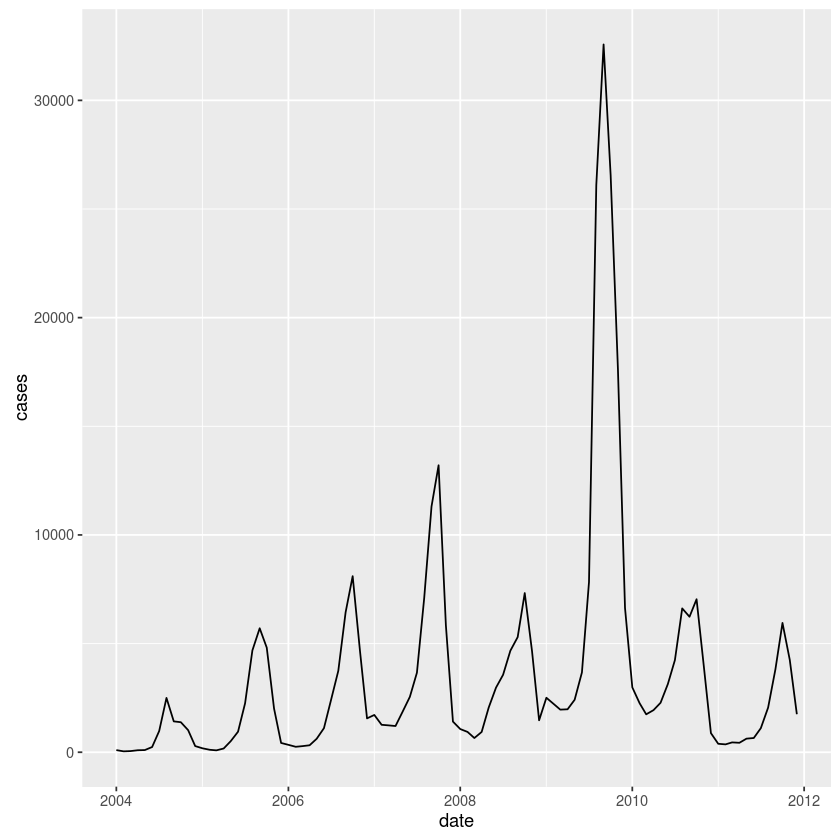

In [4]:
ggplot(data = dengue) + geom_line(aes(x = date, y = cases))

In [5]:
mod <- glm(formula = cases ~ searches, data = dengue)
summary(mod)


Call:
glm(formula = cases ~ searches, data = dengue)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4836.2  -1011.5   -168.3    718.8  20985.0  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3372.9      296.1   11.39   <2e-16 ***
searches      4357.8      283.7   15.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 8396217)

    Null deviance: 2770116855  on 95  degrees of freedom
Residual deviance:  789244397  on 94  degrees of freedom
AIC: 1807

Number of Fisher Scoring iterations: 2


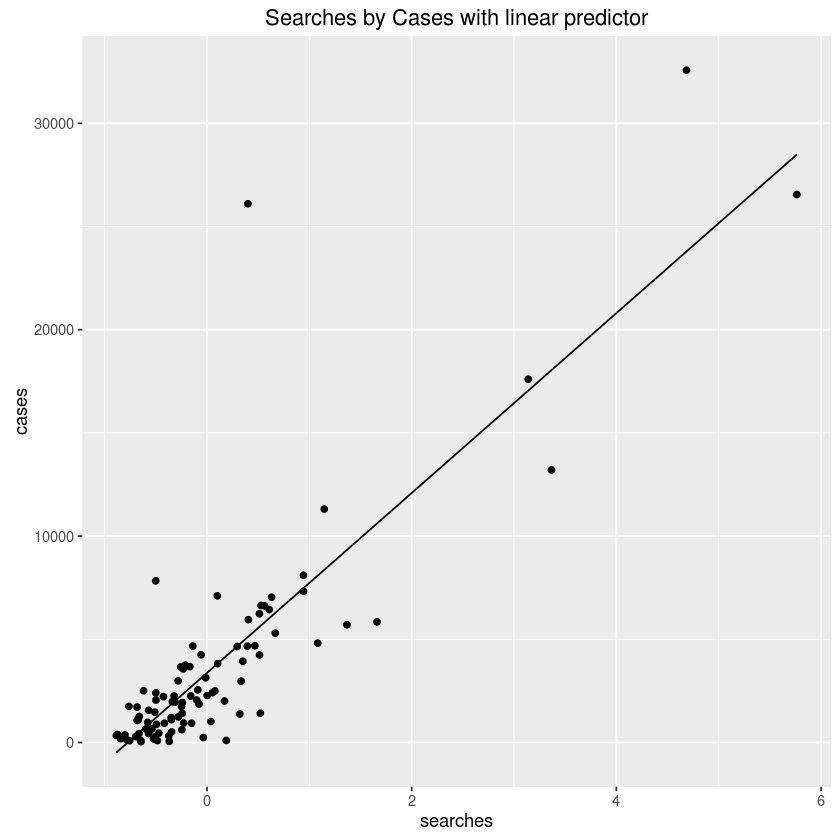

In [6]:
dengue$glm_predict_all <- predict(mod, dengue[, 'searches'])
ggplot(data = dengue) +
    geom_point(aes(x = searches, y = cases)) +
    geom_line(aes(x = searches, y = glm_predict_all)) +
    ggtitle('Searches by Cases with linear predictor')

# Part B

For the training period 2004-2006 (36 months), find the best line that explains the number of cases
of Dengue as a function of the number of searches of the term “dengue”. You should do this by solving
the least squares problem, and you should obtain the value of the y-intercept and the slope.

In [7]:
training_df <- dengue[year(dengue$date) >= 2004 & year(dengue$date) <= 2006, ]
mod_training <- glm(cases ~ searches, data = training_df)
summary(mod_training)


Call:
glm(formula = cases ~ searches, data = training_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2605.4   -644.1    -92.0    529.8   3190.1  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2155.3      220.6   9.771 2.11e-11 ***
searches      2926.4      373.2   7.842 3.96e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 1610989)

    Null deviance: 153837813  on 35  degrees of freedom
Residual deviance:  54773626  on 34  degrees of freedom
AIC: 620.63

Number of Fisher Scoring iterations: 2


# Part C

Use the equation of the line you obtained in (b) and plot the number of cases as a function of the number
of searches of the term “dengue”, predicted by your method during the training period. Compare your
results to the plot in (a) for such time period.

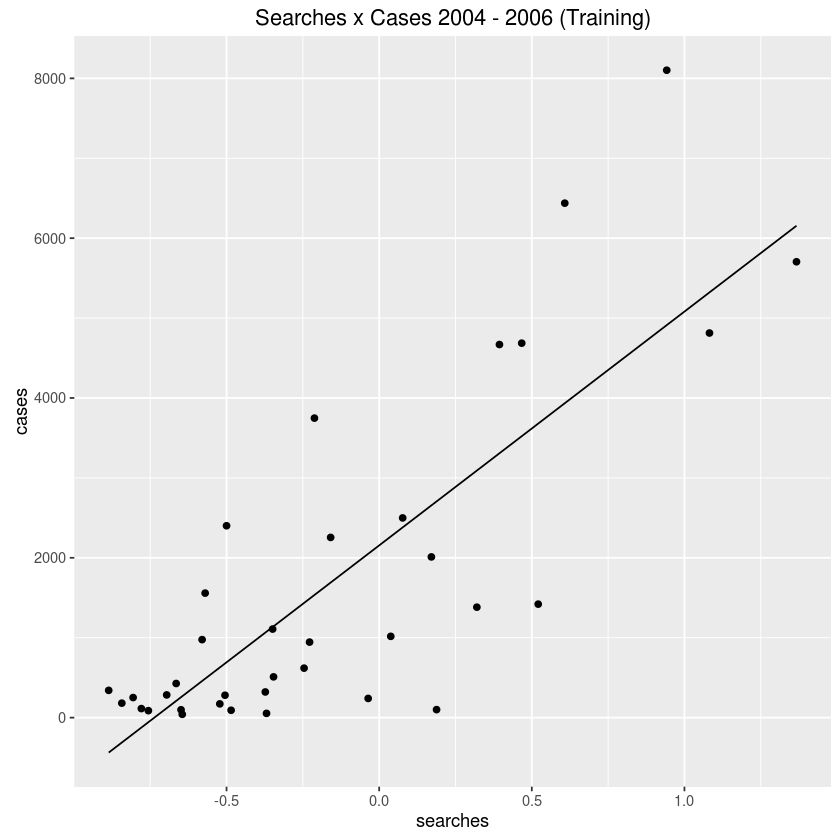

In [8]:
training_df$values_train <- predict(mod_training, training_df[, 'searches'])

g1 <- ggplot(data = training_df) +
    geom_point(aes(x = searches, y = cases)) +
    geom_line(aes(x = searches, y = values_train)) +
    ggtitle('Searches x Cases 2004 - 2006 (Training)')
g1

# Part D

For the prediction or validation period 2007-2011, use the equation of the line you obtained in (b)
to predict the number of the dengue cases as a function of the number of searches of the term “dengue”
from 2007-2011. Plot your predictions and compare them to the actual number of cases.

In [9]:
testing_df <- dengue[year(dengue$date) >= 2007, ]

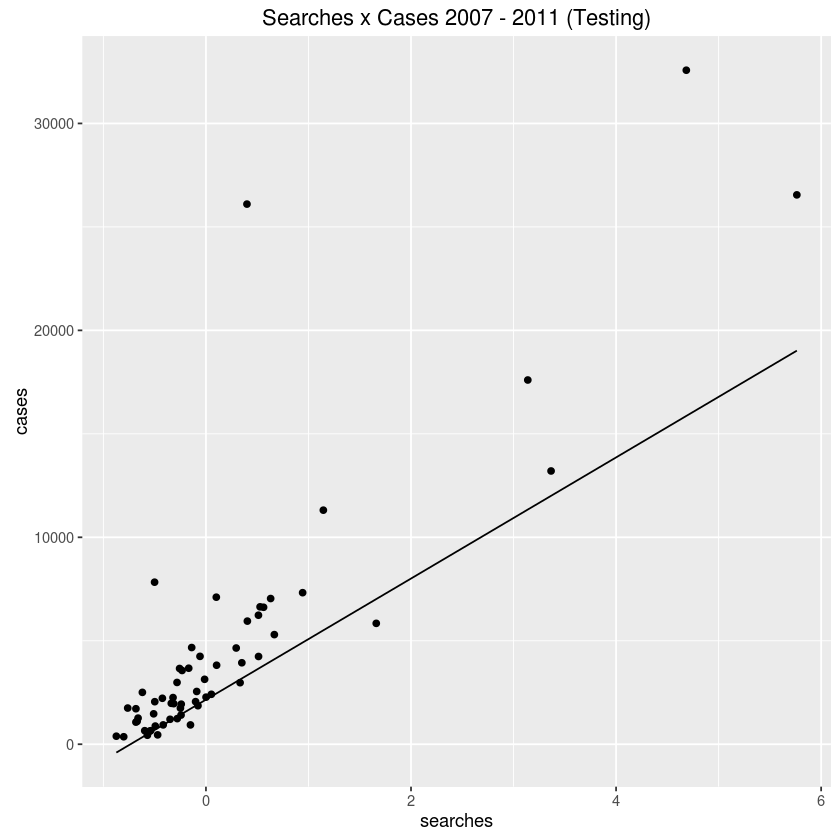

In [10]:
testing_df$predicted <- predict(mod_training, testing_df[, 'searches'])

g2 <- ggplot(data = testing_df) +
    geom_point(aes(x = searches, y = cases)) +
    geom_line(aes(x = searches, y = predicted)) +
    ggtitle('Searches x Cases 2007 - 2011 (Testing)')
g2

Warning message:
: Removed 5 rows containing missing values (geom_path).Warning message:
: Removed 1 rows containing missing values (geom_point).Warning message:
: Removed 3 rows containing missing values (geom_path).

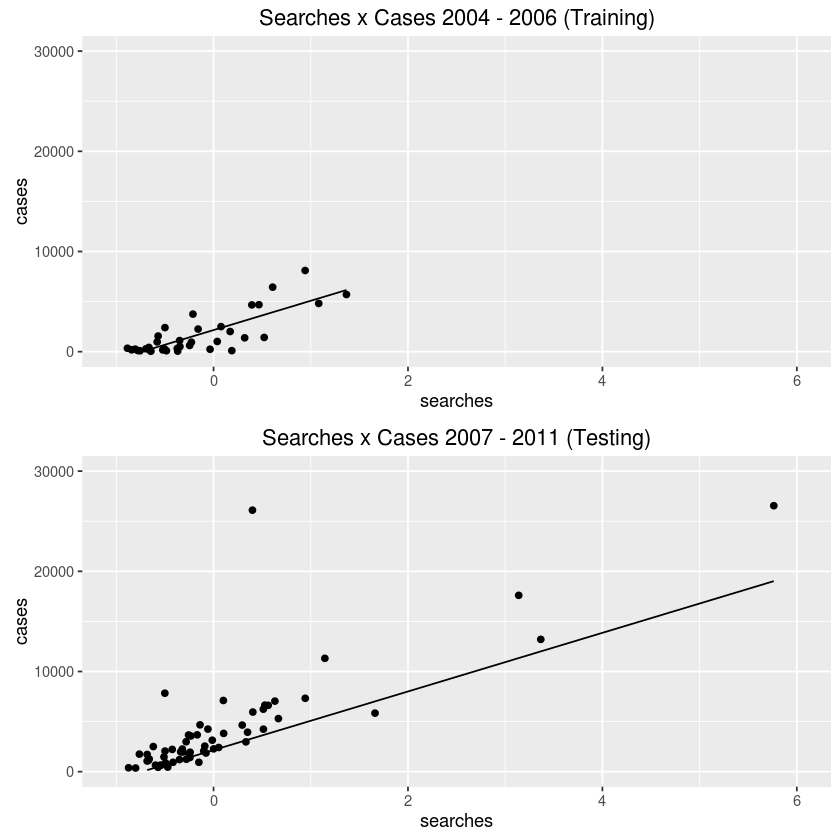

In [11]:
multiplot(g1 + xlim(-1, 6) + ylim(0, 30000),
          g2 + xlim(-1, 6) + ylim(0, 30000))

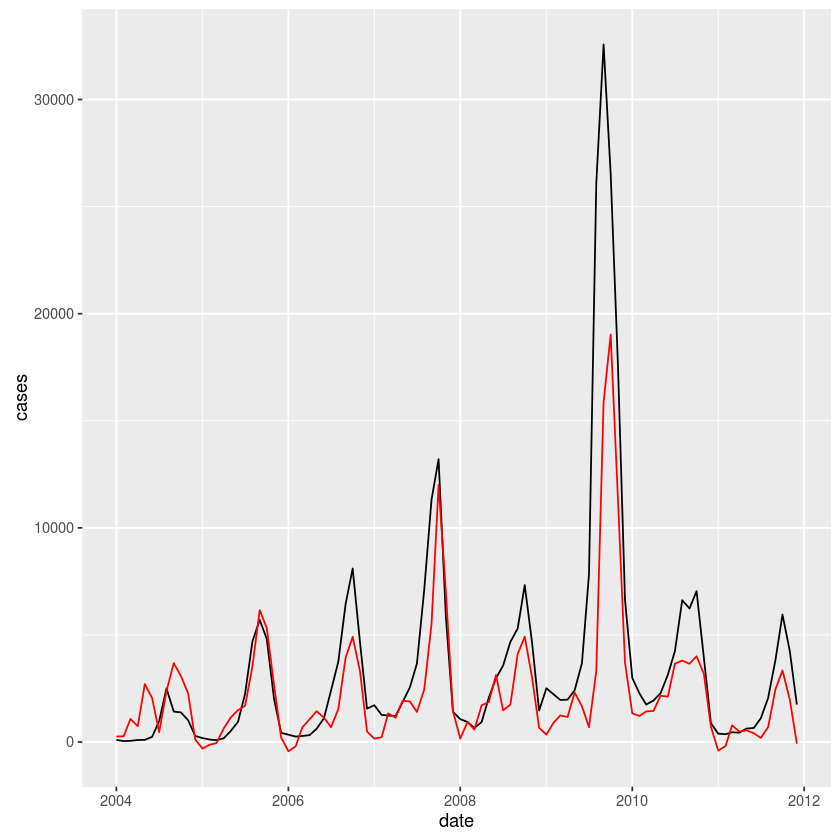

In [12]:
dengue$training_predict <- predict(mod_training, dengue[, 'searches'])
ggplot(data = dengue) +
    geom_line(aes(x = date, y = cases)) +
    geom_line(aes(x = date, y = training_predict), color = 'red')

# Part E

Discuss your results. Could you improve this modeling approach? If so, how?

- retrain as new data comes in
- account for auto correlation